In [1]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
# Make the graph beautiful
import seaborn as sns
sns.set()

In [2]:
def Simpson(xi, xf, n, f):
    x = np.linspace(xi, xf, n)
    h = (xf - xi)/(n - 1)
    y = f(x)
    
    sum1 = 0
    for i in range(1, n-1, 2):
        sum1 += y[i]

    sum2 = 0
    for i in range(2, n-1, 2):
        sum2 += y[i]

    #Simpson rule    
    sum = h*(y[0] + 4*sum1 + 2*sum2 + y[n-1])/3
    
    return sum

**General form of Fourier series** for period of $2l$ is 
$$ f(x) = \frac{a_0}{2}+\sum_{n=1}^{\infty}\left(a_n cos \frac{n\pi x}{l} + b_n sin\frac{n\pi x}{l}\right)$$
Where 
$$a_0 = \frac{1}{l}\int_{-l}^{l}f(x) dx $$

> For $ n > 1$:

$$ a_n = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)cos(nx) dx $$

$$ b_n = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)sin(nx) dx $$

To evalute the integrals I going to Simpson's $\frac{1}{3}$ (Quadratic interpolation) method. Because it is more efficient than Trapezoidal method.
[A comparison](https://github.com/Souvik-0612/Numerical-Integration-/blob/main/Analysis%20of%20Trapezoidal%20and%20Simpson1over3%20rule.ipynb)


> Problem 1: Find the Fourier Series for the period of $2\pi$.

$$ f(x)=  \left\{
\begin{array}{ll}
      -x & [-\pi, 0] \\
      x & [0,\pi] \\
\end{array} 
\right. 
$$


To determine the coefficients

In [3]:
def a(n):
    if n == 0:
        return (Simpson(-pi, 0, 31, f = lambda x: -x)/pi) + (Simpson(0, pi, 31, f = lambda x: x)/pi) #Note I took only 31 number to evalute integral.
    else:
        return (Simpson(-pi, 0, 31, f = lambda x: -x*cos(n*x))/pi) + (Simpson(0, pi, 31, f = lambda x: x*cos(n*x))/pi)
    
def b(n):
    return (Simpson(-pi, 0, 31, f = lambda x: -x*sin(n*x))/pi) + (Simpson(0, pi, 31, f = lambda x: x*sin(n*x))/pi)

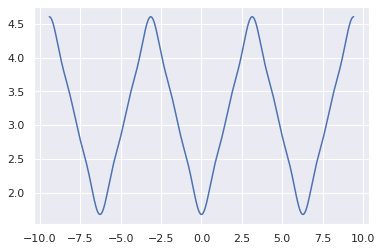

In [4]:
# Fourier series
def fourier(x, n):
    Fourier = a(0)
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-3*pi, 3*pi, 1000)
y = fourier(x, 5)

#Plotting
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x,y)
plt.show()

> Problem 2: Find the Fourier Series for the period of $2\pi$.

$$ f(x)=  \left\{
\begin{array}{ll}
      -1 & [-\pi, 0] \\
      0 & [0,\pi] \\
\end{array} 
\right. 
$$


In [5]:
def a(n):
    if n == 0:
        return Simpson(-pi, 0, 31, f = lambda x: -x**0/pi) ##Note x^0
    else:
        return Simpson(-pi, 0, 31, f = lambda x: -cos(n*x))/pi
    
def b(n):
    return Simpson(-pi, 0, 31, f = lambda x: -sin(n*x))/pi

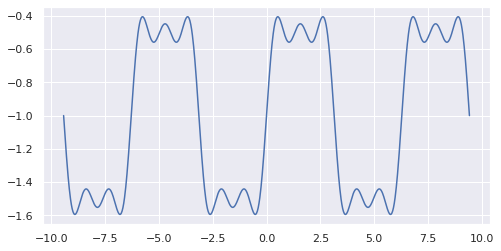

In [6]:
# Fourier series
def fourier(x, n):
    Fourier = a(0)
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-3*pi, 3*pi, 1000)
y = fourier(x, 5)

#Plotting
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x,y)
plt.show()

> Problem 3: Find the Fourier Series for the period of $2\pi$.

$$ f(x)=  \left\{
\begin{array}{ll}
      0 & [-\pi, 0] \\
      x & [0,\pi] \\
\end{array} 
\right. 
$$


In [7]:
def a(n):
    if n == 0:
        return Simpson(0, pi, 31, f = lambda x: x/pi)
    else:
        return Simpson(0, pi, 31, f = lambda x: x*cos(n*x)/pi)
    
def b(n):
    return Simpson(0, pi, 31, f = lambda x: x*sin(n*x)/pi)

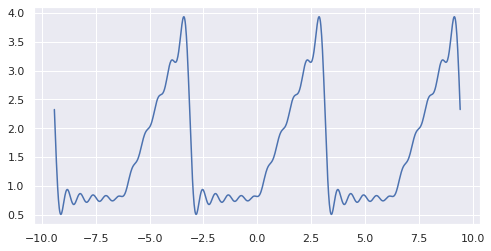

In [8]:
# Fourier series
def fourier(x, n):
    Fourier = a(0)
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-3*pi, 3*pi, 1000)
y = fourier(x, 10)

#Plotting
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x,y)
plt.show()

> Problem 4: Find the Fourier Series for the period of $2\pi$.

$$ f(x)=  \left\{
\begin{array}{ll}
      \pi - x & [-\pi, 0] \\
      0 & [0,\pi] \\
\end{array} 
\right. 
$$


In [9]:
def a(n):
    if n == 0:
        return Simpson(-pi, 0, 31, f = lambda x: pi - x)/pi
    else:
        return Simpson(-pi, 0, 31, f = lambda x: -x*cos(n*x))/pi
def b(n):
    return Simpson(-pi, 0, 31, f = lambda x: -x*sin(n*x))/pi

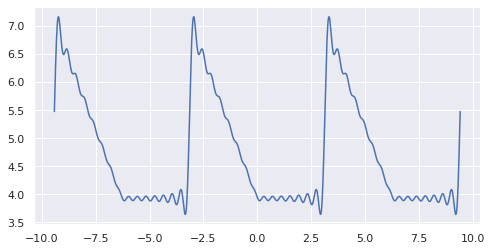

In [10]:
# Fourier series
def fourier(x, n):
    Fourier = a(0)
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-3*pi, 3*pi, 1000)
y = fourier(x, 15)

#Plotting
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(x,y)
plt.show()

From Fourier series we can derive the following relationships
> Verification the identity:
$$ \frac{\pi}{4}= 1 - \frac{1}{3} + \frac{1}{5}-... $$
or, $$\frac{\pi}{4} = \sum_{n=0}^{\infty}(-1)^n \frac{1}{2n+1}$$

In [11]:
pi/4

0.7853981633974483

In [12]:
def PIapprox1(n):
    sum = 0
    for i in range(n):
        sum += (-1)**i/(2*i+1)
    return(sum)

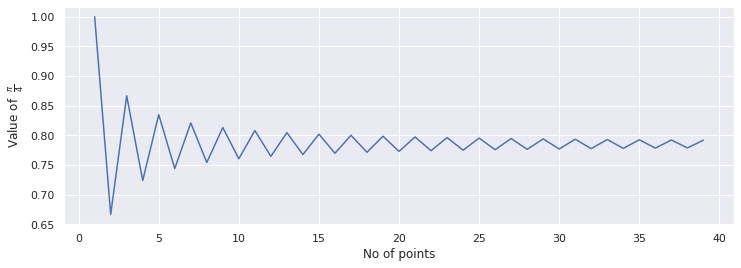

In [13]:
order = []
value = []

for i in range(1, 40):
    order.append(i)
    value.append(PIapprox1(i))
    

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(order, value)
plt.ylabel(r"Value of  $\frac{\pi}{4}$")
plt.xlabel('No of points')
plt.show()

> There is another relationship 
$$\frac{\pi^2}{8} = \sum_{n=0}^{\infty}\frac{1}{(2n+1)^2}$$

In [14]:
pi**2/8

1.2337005501361697

In [15]:
def PIapprox2(n):
    sum = 0
    for i in range(n):
        sum += 1/(2*i+1)**2
    return(sum)

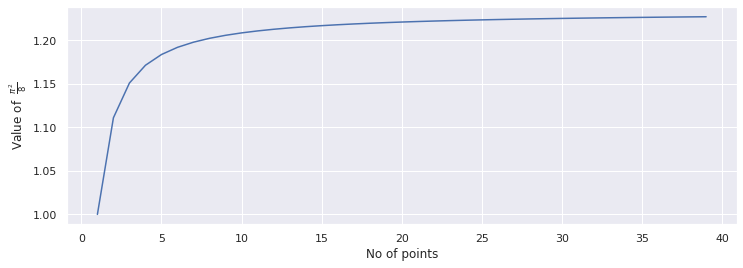

In [16]:
order = []
value = []

for i in range(1, 40):
    order.append(i)
    value.append(PIapprox2(i))
    

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(order, value)
plt.ylabel(r"Value of  $\frac{\pi^2}{8}$")
plt.xlabel('No of points')
plt.show()

My next curiosity is which of the formula is converse fast to the actual value of $\pi$.
So I rearrange the identity in this way
1.  $$\pi = 4\sum_{n=0}^{\infty}(-1)^n \frac{1}{2n+1}$$

2.  $$\pi = \sqrt{8\sum_{n=0}^{\infty}\frac{1}{(2n+1)^2}}$$

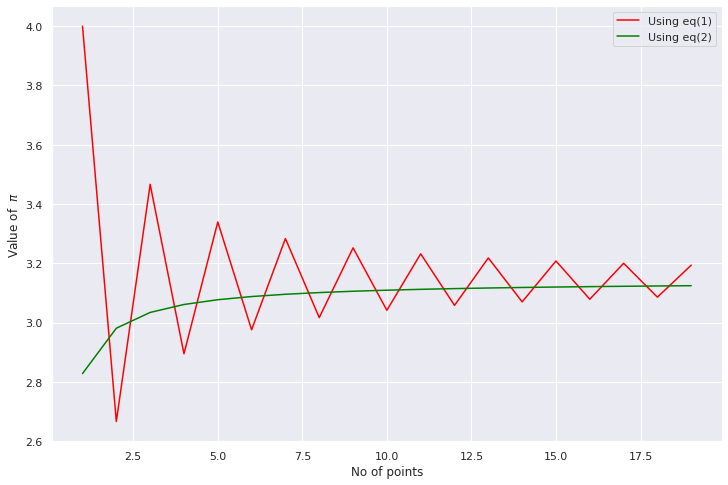

In [17]:
order = []
value1 = []
value2 = []
for i in range(1, 20):
    order.append(i)
    value1.append(4*PIapprox1(i))
    value2.append(np.sqrt(8*PIapprox2(i)))
    
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(order, value1, "red", label = "Using eq(1)")
plt.plot(order, value2, "green", label = "Using eq(2)")
plt.legend(loc = 'best')
plt.ylabel(r"Value of  $\pi$")
plt.xlabel('No of points')
plt.show()

Now I am interested about to get the Fourier series for Half-wave and Full-wave rectifier.

> **Half-wave rectifier**:
$$ f(x)=  \left\{
\begin{array}{ll}
      sin(x) & [0, \pi] \\
      0 & [\pi, 2\pi] \\
\end{array} 
\right. 
$$

In [18]:
def a(n):
    if n == 0:
        return Simpson(0, pi, 31, f = lambda x: sin(x))/pi
    else:
        return Simpson(0, pi, 31, f = lambda x: sin(x)*cos(n*x))/pi
    
def b(n):
    return Simpson(0, pi, 31, f = lambda x: sin(x)*sin(n*x))/pi

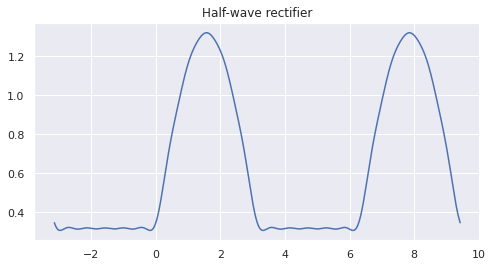

In [19]:
# Fourier series
def fourier(x, n):
    Fourier = a(0)
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-pi, 3*pi, 1000)
y = fourier(x, 10)

#Plotting
plt.rcParams["figure.figsize"] = (8,4)
plt.title("Half-wave rectifier")
plt.plot(x,y)
plt.show()

> **Full-wave rectifier**:
$$ f(x)=  \left\{
\begin{array}{ll}
      sin(x) & [0, \pi] \\
      sin(x- \pi) & [\pi, 2\pi] \\
\end{array} 
\right. 
$$

In [20]:
def a(n):
    if n == 0:
        return (Simpson(0, pi, 31, f = lambda x: sin(x))/pi) + (Simpson(pi, 2*pi, 31, f = lambda x: sin(x-pi))/pi)
    else:
        return (Simpson(0, pi, 31, f = lambda x: sin(x)*cos(n*x))/pi) + (Simpson(pi, 2*pi, 31, f = lambda x: sin(x-pi)*cos(n*x))/pi)
    
def b(n):
    return (Simpson(0, pi, 31, f = lambda x: sin(x)*sin(n*x))/pi) + (Simpson(pi, 2*pi, 31, f = lambda x: sin(x-pi)*sin(n*x))/pi)

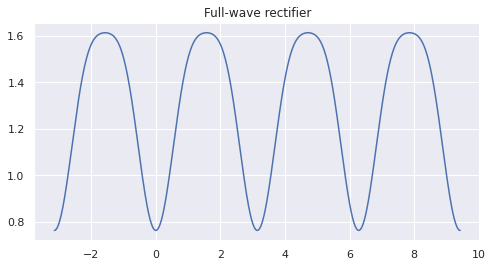

In [21]:
# Fourier series
def fourier(x, n):
    Fourier = a(0)
    for i in range(1,n+1):
        Fourier += a(i)*np.cos(i*x) + b(i)*np.sin(i*x)
    return Fourier

x = np.linspace(-pi, 3*pi, 1000)
y = fourier(x, 5)

#Plotting
plt.rcParams["figure.figsize"] = (8,4)
plt.title("Full-wave rectifier")
plt.plot(x,y)
plt.show()